In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d={'p':[12.04,17.18,11.83,6.23,16.99,3.87],
   'tmax':[23.7,15.5,13.1,13.5,21.1,20.30],
    'tmin':[5.9,-1.8,2.8,-2.4,7.2,-0.90],
   'ville':['Ajaccio','Brest','Dunkerque','Nancy','Nice','Toulouse']
}

In [3]:
df=pd.DataFrame(d)
df

,p,tmax,tmin,ville
0,12.04,23.7,5.9,Ajaccio
1,17.18,15.5,-1.8,Brest
2,11.83,13.1,2.8,Dunkerque
3,6.23,13.5,-2.4,Nancy
4,16.99,21.1,7.2,Nice
5,3.87,20.3,-0.9,Toulouse


# Moyennes /Ecart-Type:

## variable  p:

In [4]:
moy_p=np.round(sum(df.p)/len(df),2)
moy_p

11.36

In [5]:
var_p=np.round(sum([(x - moy_p)**2 for x in df.p])/len(df),2)
var_p

24.78

In [6]:
ecrt_p=np.round(np.sqrt(var_p),2)
ecrt_p

4.98

## variable tmax

In [7]:
moy_tmax=np.round(sum(df.tmax)/len(df),2)
moy_tmax

17.87

In [8]:
var_tmax=np.round(sum([(x - moy_tmax)**2 for x in df.tmax])/len(df),2)
var_tmax

16.3

In [9]:
ecrt_tmax=np.round(np.sqrt(var_tmax),2)
ecrt_tmax

4.04

## variable tmin

In [10]:
moy_tmin=np.round(sum(df.tmin)/len(df),2)
moy_tmin

1.8

In [11]:
var_tmin=np.round(sum([(x - moy_tmin)**2 for x in df.tmin])/len(df),2)
var_tmin

14.14

In [12]:
ecrt_tmin=np.round(np.sqrt(var_tmin),2)
ecrt_tmin

3.76

# Matrice Centrer Reduite CR:

In [13]:
DCR=df[['p','tmax','tmin']].copy()
DCR.p=[np.round((x - moy_p)/ecrt_p,2) for x in DCR.p]
DCR.tmax=[np.round((x - moy_tmax)/ecrt_tmax,2) for x in DCR.tmax]
DCR.tmin=[np.round((x - moy_tmin)/ecrt_tmin,2) for x in DCR.tmin]
DCR

,p,tmax,tmin
0,0.14,1.44,1.09
1,1.17,-0.59,-0.96
2,0.09,-1.18,0.27
3,-1.03,-1.08,-1.12
4,1.13,0.80,1.44
5,-1.50,0.60,-0.72


In [14]:
MCR=DCR.values
MCR

array([[ 0.14,  1.44,  1.09],
       [ 1.17, -0.59, -0.96],
       [ 0.09, -1.18,  0.27],
       [-1.03, -1.08, -1.12],
       [ 1.13,  0.8 ,  1.44],
       [-1.5 ,  0.6 , -0.72]])

# Matrice de correlation U

In [15]:
U=(MCR.T.dot(MCR))/len(df)
U=np.round(U,2)
U

array([[1.  , 0.09, 0.49],
       [0.09, 1.  , 0.62],
       [0.49, 0.62, 1.  ]])

In [16]:
#VERIF
DCR.corr()

,p,tmax,tmin
p,1.000000,0.087172,0.485212
tmax,0.087172,1.000000,0.624012
tmin,0.485212,0.624012,1.000000


# Valeur propres

In [17]:
valeurs_propres,vecteurs_propres=np.linalg.eig(U)
valeurs_propres=valeurs_propres.round(2)
vecteurs_propres=vecteurs_propres.round(2)

In [18]:
valeurs_propres

array([1.84, 0.91, 0.25])

In [19]:
vecteurs_propres=-vecteurs_propres
vecteurs_propres

array([[ 0.46,  0.79,  0.41],
       [ 0.56, -0.62,  0.55],
       [ 0.69, -0.03, -0.73]])

In [20]:
v1=vecteurs_propres[:,0]
v2=vecteurs_propres[:,1]
v3=vecteurs_propres[:,2]
v1,v2,v3

(array([0.46, 0.56, 0.69]),
 array([ 0.79, -0.62, -0.03]),
 array([ 0.41,  0.55, -0.73]))

## Verification vecteur propre 1

In [21]:
U.dot(v1)

array([0.8485, 1.0292, 1.2626])

In [22]:
valeurs_propres[0]*v1

array([0.8464, 1.0304, 1.2696])

In [23]:
u1=v1

## Verification vecteur propre 2

In [24]:
U.dot(v2)

array([ 0.7195, -0.5675, -0.0273])

In [25]:
valeurs_propres[1]*v2

array([ 0.7189, -0.5642, -0.0273])

In [26]:
u2=v2

## Composantes principales

In [27]:
PCA1=MCR.dot(u1)
PCA1=np.round(PCA1,2)
PCA1

array([ 1.62, -0.45, -0.43, -1.85,  1.96, -0.85])

In [28]:
PCA2=MCR.dot(u2)
PCA2=np.round(PCA2,2)
PCA2

array([-0.81,  1.32,  0.79, -0.11,  0.35, -1.54])

In [29]:
DCR['PCA1']=PCA1
DCR['PCA2']=PCA2
DCR.index=df.ville.values
DCR

,p,tmax,tmin,PCA1,PCA2
Ajaccio,0.14,1.44,1.09,1.62,-0.81
Brest,1.17,-0.59,-0.96,-0.45,1.32
Dunkerque,0.09,-1.18,0.27,-0.43,0.79
Nancy,-1.03,-1.08,-1.12,-1.85,-0.11
Nice,1.13,0.80,1.44,1.96,0.35
Toulouse,-1.50,0.60,-0.72,-0.85,-1.54


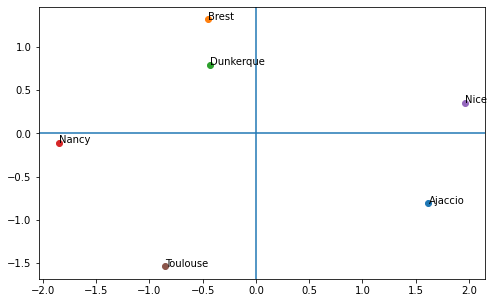

In [30]:
fig = plt.figure(figsize=(8,5))
plt.axhline()
plt.axvline()
for i in range(len(DCR)):
    
    plt.plot(DCR.PCA1[i],DCR.PCA2[i],'o')
    plt.text(DCR.PCA1[i],DCR.PCA2[i],DCR.index[i])

# Correlation variables and Composantes standards

In [31]:
DCR.corr().round(2)

,p,tmax,tmin,PCA1,PCA2
p,1.00,0.09,0.49,0.62,0.75
tmax,0.09,1.00,0.62,0.76,-0.59
tmin,0.49,0.62,1.00,0.93,-0.03
PCA1,0.62,0.76,0.93,1.00,-0.01
PCA2,0.75,-0.59,-0.03,-0.01,1.00


Text(0, 0.5, 'PCA2 30%')

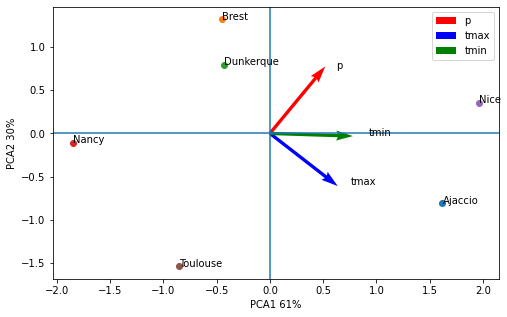

In [111]:
plt.figure(figsize=(8,5))
plt.axhline()
plt.axvline()

for i in range(len(DCR)):
    
    plt.plot(DCR.PCA1[i],DCR.PCA2[i],'o')
    plt.text(DCR.PCA1[i],DCR.PCA2[i],DCR.index[i])

plt.quiver(0.62,0.75,label='p',scale=5, color='r')
plt.text(0.62,0.75,'p')
plt.quiver(0.76,-0.59,label='tmax',scale=5,color='b')
plt.text(0.76,-0.59,'tmax')
plt.quiver(0.93,-0.03,label='tmin',scale=5,color='g')
plt.text(0.93,-0.03,'tmin')
plt.legend()
plt.xlabel('PCA1 61%')
plt.ylabel('PCA2 30%')

In [33]:
valeurs_propres[0]/sum(valeurs_propres)

0.6133333333333334

In [34]:
valeurs_propres[1]/sum(valeurs_propres)

0.30333333333333334

# Application :Predict Diabetes (avec python :sklearn)

In [35]:
df=pd.read_csv(r"C:\Users\mohamed\Downloads\Predict Diabetes\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.shape

(768, 9)

In [37]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
scaler=StandardScaler()

In [40]:
scaler_x=scaler.fit_transform(x)
scaler_x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [41]:
pca=PCA(n_components=6)

In [42]:
x_pca=pca.fit_transform(scaler_x)
x_pca=np.round(x_pca,2)
x_pca

array([[ 1.07,  1.23,  0.1 ,  0.5 , -0.11,  0.36],
       [-1.12, -0.73, -0.71,  0.29, -0.39, -0.41],
       [-0.4 ,  1.6 ,  1.76, -0.07,  0.91, -0.04],
       ...,
       [-0.28,  0.1 , -0.08, -0.69, -0.52, -0.54],
       [-1.06,  0.84,  0.43, -0.2 ,  0.96,  0.15],
       [-0.84, -1.15, -1.01,  0.09, -0.08, -0.15]])

Text(0, 0.5, 'deuxieme composante principale')

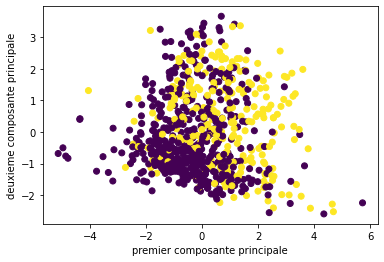

In [43]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel("premier composante principale")
plt.ylabel("deuxieme composante principale")

# Application :heart

In [44]:
df=pd.read_csv(r"C:\Users\mohamed\Downloads\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
x=df.drop(['output'],axis=1)
y=df['output']

In [46]:
scaler2=StandardScaler()
scaler2_x=scaler2.fit_transform(x)
scaler2_x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [47]:
pca2=PCA(n_components=3)
x_pca2=pca2.fit_transform(scaler2_x)
x_pca2=np.round(x_pca2,2)

Text(0, 0.5, 'deuxieme composante principale')

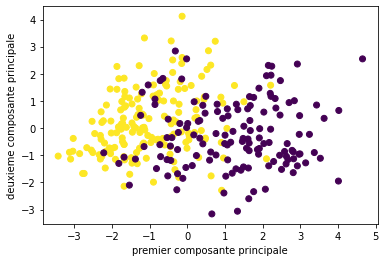

In [48]:
plt.scatter(x_pca2[:,0],x_pca2[:,1],c=y)
plt.xlabel("premier composante principale")
plt.ylabel("deuxieme composante principale")

# Analyse factorielle des correspondances:

In [50]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\archive (1)\xAPI-Edu-Data.csv")
data.headd()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [85]:
data.shape

(480, 17)

Text(0.5, 1.0, 'Student Absence Days')

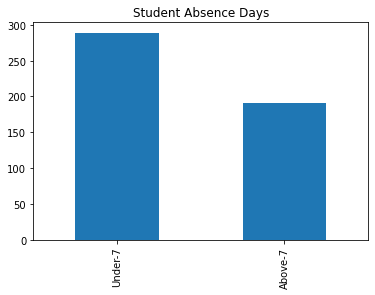

In [114]:
data.StudentAbsenceDays.value_counts().plot(kind='bar')
plt.title('Student Absence Days')

Text(0.5, 1.0, 'Section ID')

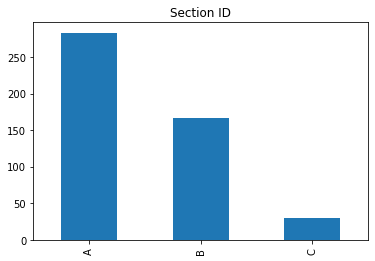

In [113]:
data.SectionID.value_counts().plot(kind='bar')
plt.title('Section ID')

# Tableau de contingence:

In [83]:
TC=pd.crosstab(data['SectionID'],data['StudentAbsenceDays'])
TC

StudentAbsenceDays,Above-7,Under-7
SectionID,,
A,115,168
B,67,100
C,9,21


## Hypotheses:

### H0: la variable "StudentAbsenceDays" et "SectionID" sont independant.
### H1:il ya une relation entre les deux variables.

### *On a n=480>30 donc on peut utliser test chi2 X2:

# Tableau de frequences:

In [87]:
TCF=TC/480
TCF

StudentAbsenceDays,Above-7,Under-7
SectionID,,
A,0.239583,0.350000
B,0.139583,0.208333
C,0.018750,0.043750


# profils lignes mariginales:

In [97]:
fl=[TCF.loc['A'].sum(),TCF.loc['B'].sum(),TCF.loc['C'].sum()]
fl=np.round(fl,2)
fl

array([0.59, 0.35, 0.06])

# profils colonnes mariginales:

In [99]:
fc=[TCF['Above-7'].sum(),TCF['Under-7'].sum()]
fc=np.round(fc,2)
fc

array([0.4, 0.6])

# calcule de X2:

In [108]:
tableau_frequences=TCF.values
tableau_frequences

array([[0.23958333, 0.35      ],
       [0.13958333, 0.20833333],
       [0.01875   , 0.04375   ]])

In [110]:
x2=0
for i in range(len(tableau_frequences)):
    for j in range(len(tableau_frequences[0])):
        o=tableau_frequences[i,j]
        e=fl[i]*fc[j]
        x2+=((o - e)**2)/e
x2=round(x2*480,3)
x2

1.407

# conclusion :H0?H1?

### X2=1.407
### r=(3-1)*(2-1)=3
### seuil de signification=0.05
### X2-critique=7.815
### conclusion:x2 < x2-critique  => on accepte H0

# 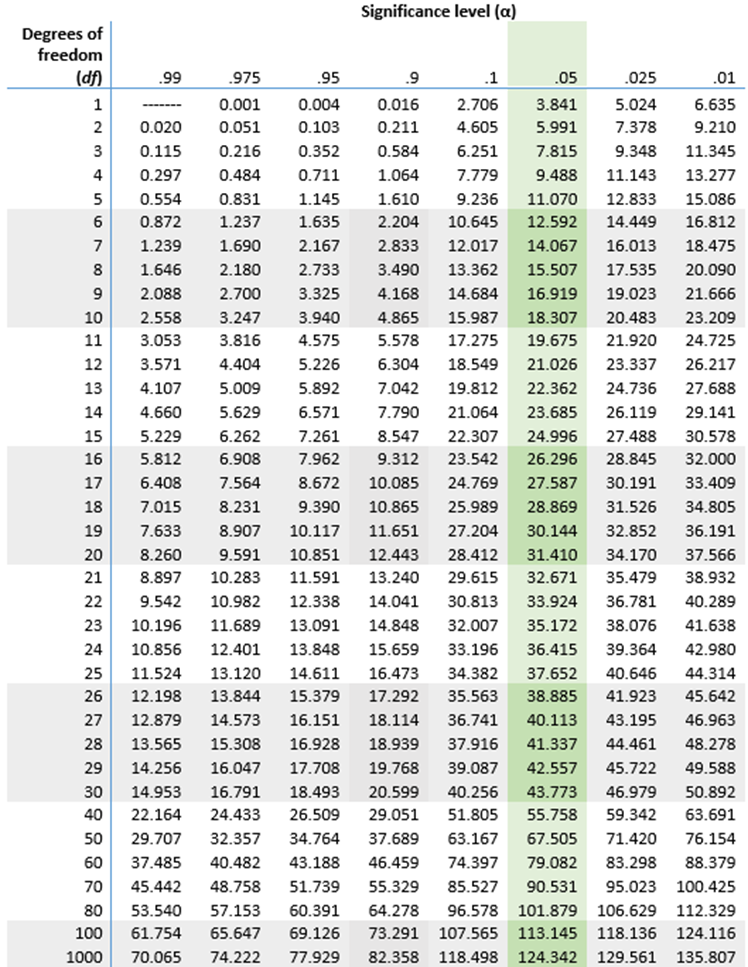